<a href="https://colab.research.google.com/github/lurwan2107/ArewaDS_DeepLearning/blob/main/01_PyTorch_workflow_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Notebook:
----------------------
This template contains solutions of two exercises which I named `Exercise level 1` and `Exercise level 2`.


## Exercise Level 1
Exercise level 1 is the Basic PyTorch workflow that has five questions in total.


In [2]:
# Importing required packages
import torch
from torch import nn
import matplotlib.pyplot as plt

In [3]:
# Setting device agonistic (checking if we have GPU)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

### Q1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
- Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.



In [ ]:
# Setting the weight=0.3 and bias=0.9 respectively
w = 0.3
b = 0.9

# Creating a data that will give us a total of 100 datapoints
start = 0
end = 1
step = 0.01

# Making input feature (X) and it's corresponding output target (Y) using linear regression
x = torch.arange(start, end, step).unsqueeze(dim=1) # feature X
y = w * x + b # target Y

# Printing the result to make sure we have 100 datapoints as requested
print(f"The number of (X) samples is: {len(x)}")
print(f"The number of (Y) samples is: {len(y)}")
print(f"The first [10] samples of X and Y is:\n\nX: {x[:10]}\nY: {y[:10]}")

The number of (X) samples is: 100
The number of (Y) samples is: 100
The first [10] samples of X and Y is:

X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
Y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


- Split the data into 80% training, 20% testing.

In [ ]:
# Calculating the parcentage
data_split = int(0.8 * len(x))

# Taking the 8% of the data
x_train = x[:data_split]
y_train = x[:data_split]

# Taking the 20% of the data
x_test = x[data_split:]
y_test = x[data_split:]

# Making sure we take the correct parcentage
print(f"The parcentage of Training Data is: {len(x_train)}%\nThe parcentage of Training Label is: {len(y_train)}%\n")
print(f"The parcentage of Testing Data is : {len(x_test)}%\nThe parcentage of Testing Labels is {len(y_test)}%")

The parcentage of Training Data is: 80%
The parcentage of Training Label is: 80%

The parcentage of Testing Data is : 20%
The parcentage of Testing Labels is 20%


- Plot the training and testing data so it becomes visual.

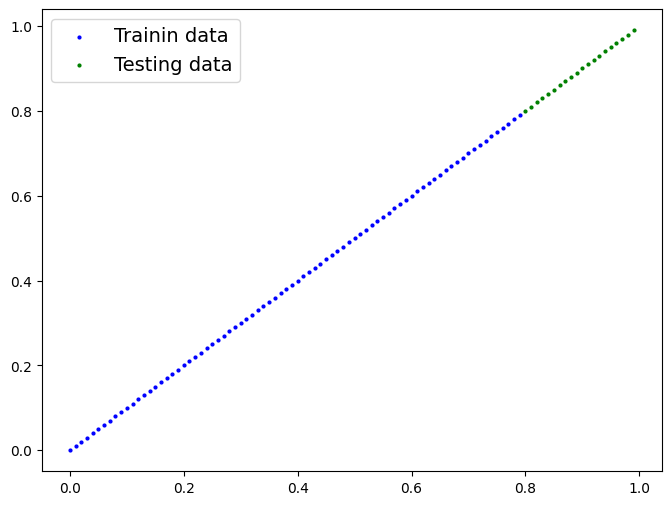

In [ ]:
# Creating a function to give us a visual view of our data
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
  # Setting the figure size
  plt.figure(figsize=(8, 6))

  # Ploting training data and it's corresponding labels in blue color
  plt.scatter(train_data, train_labels, c='b', s=4, label='Trainin data')

  # Ploting testing data and it's corresponding labels in green color
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

  # Making a branching that will give us a red visualization of our data after prediction
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  plt.legend(prop={'size': 14})

plot_predictions()

## 2. Building a PyTorch Model by Subclassing `nn.Module`
- Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.

In [ ]:
# Creating a linear regression model by subclassing nn.Module
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Randomly initializing a weight parameter
    self.w = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    # Randomly initializing a bias parameter
    self.b = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

  # Implementing the forward method to compute the linear regression in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.w * x + self.b

- Once you've constructed the model, make an instance of it and check its `state_dict()`.

In [ ]:
# Setting the manual seed since our parameters a randomly initialized
torch.manual_seed(42)

# Making the instance of our linear regression class and at the same time moving it to GPU
my_model_0 = LinearRegressionModel().to(device)

# checking the state_dict() to list the status of the named parameters
next(my_model_0.parameters()).device, my_model_0.state_dict()

(device(type='cuda', index=0),
 OrderedDict([('w', tensor([0.3367], device='cuda:0')),
              ('b', tensor([0.1288], device='cuda:0'))]))

### Q3. Craete a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
- Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.

In [ ]:
# Creating the loss function
loss_fn = nn.L1Loss()

# Creating the optimizer and setting the learning rate to 0.01
optimizer = torch.optim.SGD(params=my_model_0.parameters(), lr=0.01)

In [ ]:
# Setting manual seed
torch.manual_seed(42)

# Setting to epoch to 300
epochs = 300

# Moving the datasets to GPU
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

### Training loop
# Writing a training loop to perform the appropriate training steps for 300 epochs.
for epoch in range(epochs):

  # Putting the model in training mode
  my_model_0.train()

  # 1. Forward pass on the training data
  y_preds = my_model_0(x_train)

  # 2. Calculating the loss
  loss = loss_fn(y_preds, y_train)

  # 3. Zero grad of the optimizer
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Stepping the optimizer
  optimizer.step()

  ### Testing
  # Training the loop to test the model on the test dataset every 20 epochs.
  if epoch % 20 == 0:

    # Putting the model in  the evaluation mode
    my_model_0.eval()

    with torch.inference_mode():

      # 1. Forward pass on test data
      test_preds = my_model_0(x_test)

      # 2. Calculating the loss on test datd
      test_loss = loss_fn(test_preds, y_test)

      # Printing the result
      print(f"Epoch: {epoch}   | Train loss: {loss:.3f}   | Test loss: {test_loss:.3f}")

Epoch: 0   | Train loss: 0.166   | Test loss: 0.457
Epoch: 20   | Train loss: 0.124   | Test loss: 0.339
Epoch: 40   | Train loss: 0.111   | Test loss: 0.280
Epoch: 60   | Train loss: 0.103   | Test loss: 0.249
Epoch: 80   | Train loss: 0.096   | Test loss: 0.227
Epoch: 100   | Train loss: 0.089   | Test loss: 0.211
Epoch: 120   | Train loss: 0.083   | Test loss: 0.195
Epoch: 140   | Train loss: 0.076   | Test loss: 0.179
Epoch: 160   | Train loss: 0.069   | Test loss: 0.162
Epoch: 180   | Train loss: 0.062   | Test loss: 0.146
Epoch: 200   | Train loss: 0.055   | Test loss: 0.130
Epoch: 220   | Train loss: 0.048   | Test loss: 0.114
Epoch: 240   | Train loss: 0.042   | Test loss: 0.097
Epoch: 260   | Train loss: 0.035   | Test loss: 0.081
Epoch: 280   | Train loss: 0.028   | Test loss: 0.065


### Q4. Make Predictions with the trained model on the test data.



In [ ]:
# Putting the model in the evaluation mode
my_model_0.eval()

# Making prediction on the test data
with torch.inference_mode():
  y_preds = my_model_0(x_test)

y_preds

tensor([[0.7605],
        [0.7695],
        [0.7784],
        [0.7874],
        [0.7964],
        [0.8053],
        [0.8143],
        [0.8232],
        [0.8322],
        [0.8411],
        [0.8501],
        [0.8590],
        [0.8680],
        [0.8770],
        [0.8859],
        [0.8949],
        [0.9038],
        [0.9128],
        [0.9217],
        [0.9307]], device='cuda:0')

- Visualize these predictions against the original training and testing data

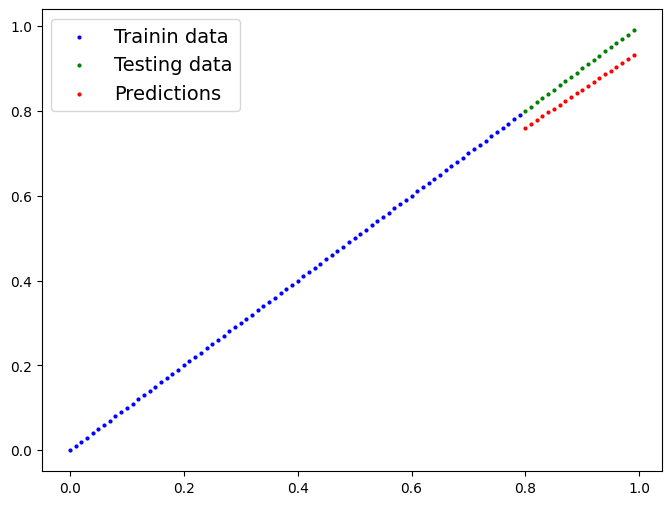

In [ ]:
# Visualizing the prediction
plot_predictions(predictions=y_preds.cpu())

### Q5. Save your tarined model's `state_dict()` to file.

In [ ]:
from pathlib import Path

# Creating model directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Creating model save path
MODEL_NAME = '01_PyTorch_workflow_Exercise_01.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Saving the model state_dict()
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=my_model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_PyTorch_workflow_Exercise_01.pth


- Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.

In [ ]:
# Creating new instance
my_model_1 = LinearRegressionModel()

# Loading the saved state_dict()
my_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
my_model_1.to(device)

print(f"Loaded model:\n{my_model_1}\n")
print(f"The Model is Located on: {next(my_model_1.parameters()).device} GPU")

Loaded model:
LinearRegressionModel()

The Model is Located on: cuda:0 GPU


- Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [ ]:
# Putting the model in the evaluation mode
my_model_1.eval()

# Performing the prediction
with torch.inference_mode():

  my_model_preds = my_model_1(x_test)

y_preds == my_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

# Exercise Level 2
### PyTorch Workflow Advanced Assignment.

### Q1. Loading our data.
(a) Load the Synchronous Machine Learning Dataset as Numpy array.

In [4]:
# Importing the neccessary libraries
import torch
from torch import  nn
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt

In [5]:
# downloading the dataset
!wget https://archive.ics.uci.edu/static/public/607/synchronous+machine+data+set.zip -O data.zip

--2023-12-31 08:44:22--  https://archive.ics.uci.edu/static/public/607/synchronous+machine+data+set.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.zip’

data.zip                [ <=>                ]  14.37K  --.-KB/s    in 0.04s   

2023-12-31 08:44:23 (381 KB/s) - ‘data.zip’ saved [14713]



In [6]:
# unziping the data
with zipfile.ZipFile('data.zip', 'r') as my_zip:
  my_zip.extractall()

In [7]:
# reading the csv data and passing to pandas
dataset_name = "synchronous machine.csv"
data = pd.read_csv(dataset_name, delimiter=';', thousands=',')
data

,Iy,PF,e,dIf,If
0,3,66,34,383,1563
1,3,68,32,372,1552
2,3,7,3,36,154
3,3,72,28,338,1518
4,3,74,26,317,1497
...,...,...,...,...,...
552,6,91,9,142,1322
553,6,93,7,151,1331
554,6,95,5,16,134
555,6,97,3,16,134


In [8]:
# getting the numpy data
numpy_data = data.values
numpy_data

array([[   3,   66,   34,  383, 1563],
       [   3,   68,   32,  372, 1552],
       [   3,    7,    3,   36,  154],
       ...,
       [   6,   95,    5,   16,  134],
       [   6,   97,    3,   16,  134],
       [   6,   99,    1,   16,  134]])

(b) Converting the Numpy array to PyTorch tensor, `original data tensor`.

In [9]:
# Let's write a few codes to make sure our data is Numpy array
if isinstance(numpy_data, np.ndarray):
  print('The object is NumPy Array')
else:
  print("The object you're trying to use is not a numpy array")

The object is NumPy Array


In [10]:
# converting numpy array to PyTorch tensor
original_data_tensor = torch.from_numpy(numpy_data)

#changes in tensor is reflected in numpy array unless you explicitly copy it (so that's why I will copy it)
original_data_tensor = original_data_tensor
original_data_tensor

tensor([[   3,   66,   34,  383, 1563],
        [   3,   68,   32,  372, 1552],
        [   3,    7,    3,   36,  154],
        ...,
        [   6,   95,    5,   16,  134],
        [   6,   97,    3,   16,  134],
        [   6,   99,    1,   16,  134]])

### Q2. Art of "Tensor Manipulation"
(a) Print the size of the dataset.

In [11]:
# printing the size of the data
data_size = len(original_data_tensor)
print(f"The size of the dataset is: {data_size}")

The size of the dataset is: 557


(b) Create a tensor, `my_pi_tensor` of same size as `original_data_tensor` containing values of `3.142` at
every point and placed on your GPU device. Print the first `13 rows`. Print tensor device location.
Print tensor datatype.

In [12]:
# There are 2 approaches you can create tensor containing values of 3.142 at every point.

#1. you either create tensor of (ones values) and multiply it by 3.142, like below
'''
my_pi_tensor = torch.ones(size=(data_size, 5)) * 3.142
print(f"The firs 13 rows are:\n{my_pi_tensor[:13]}")
'''
# 2. Or used built in full() method, that will allow you to fill the desired values e.g
my_pi_tensor = torch.full((data_size, 5), 3.142).to(device) # Placing the tensor on the GPU

print(f"The firs 13 rows are:\n{my_pi_tensor[:10]}") # printing the first 13 rows

# printing tensor device location
print(f"The tensor is located on:\ndevice {my_pi_tensor.get_device()}")

print(f"My Pi Tensor has ({my_pi_tensor.dtype}) data type") # printing the data type of my_pi_tensor

The firs 13 rows are:
tensor([[3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420]], device='cuda:0')
The tensor is located on:
device 0
My Pi Tensor has (torch.float32) data type


(c) Print the fifth-root of the sum of all values in `my pi tensor`.

In [ ]:
# function to print the fifth-root my_pi_tensor
def fifth_root(num, root):
  answer = num**(1/root)
  print(f"The fifth-root of {sum_pi} is:\n{answer:.5f}")

sum_pi = torch.sum(my_pi_tensor)
fifth_root(sum_pi, 5)

The fifth-root of 8750.46875 is:
6.14336


(d) Create a new tensor, `my_data_tensor` using the first and last 100 rows from the `original_data_tensor`.
Print size of my data tensor [Expect a size of 200 rows].

In [ ]:
# Craeting a new tensor of size 200 from the original_data_tensor

my_data_tensor = torch.cat([original_data_tensor[:100, :], original_data_tensor[-100:, :]])
my_data_tensor.size()

torch.Size([200, 5])

(e) Create two 1-D tensors, `features` and `target` from `my_data_tensor`. The feature is dIf (Changing of excitation current of synchronous machine) column and target is If (Excitation current of synchronous machine)

In [ ]:
# creating a two 1-D tensors
x_1 = my_data_tensor[:, 3].clone().detach() # I used this format to preserve all the properties of the original tensor
y_1 = my_data_tensor[:, 4].clone().detach()

# checking their dimensions
print(f"Dimension of feature tensor is: ({x_1.ndim})")
print(f"Dimension of target tensor is: ({y_1.ndim})")

Dimension of feature tensor is: (1)
Dimension of target tensor is: (1)


(f) Split your data into training and test data of ratio 75:25 respectively.

In [ ]:
# splitting the data to 75:25 ratio
train_test_split = int((len(x_1) * 0.75))

# training data
x_train_1 = x_1[:train_test_split]
y_train_1 = y_1[:train_test_split]

# testing data
x_test_1 = x_1[train_test_split:]
y_test_1 = y_1[train_test_split:]

len(x_train_1), len(y_train_1), len(x_test_1), len(y_test_1)

(150, 150, 50, 50)

## Q3. Define your Linear model structure. You can use existing model.

In [4]:
# subclassing nn.Module
class LinearRegressionModelV3(nn.Module):
  def __init__(self):
    super().__init__()

    # I will use (nn.Linear()) instead of (nn.parameters()) to create  the model parameters
    #self.linear_layer = nn.Linear(in_features=1, out_features=1)
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    # Defining forward computation
  def forward(self, x_1: torch.Tensor) -> torch.Tensor:
    #return self.linear_layer(x_1)
    return self.weights * x_1 + self.bias

torch.manual_seed(42)
my_model_2 = LinearRegressionModelV3()
my_model_2, my_model_2.state_dict()

(LinearRegressionModelV3(),
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

In [5]:
# Checking model device
next(my_model_2.parameters()).device

device(type='cpu')

In [6]:
# Let's move it to GPU
my_model_2.to(device)
next(my_model_2.parameters()).device

device(type='cuda', index=0)

In [ ]:
# creating loss function
loss_fn_1 = nn.L1Loss()

# Creating optimizer and choosing the learning rate to be 0.01
optimizer_1 = torch.optim.SGD(params=my_model_2.parameters(), lr=0.001)


### Q4. Train model for any number of epochs. Generate 1 plot of Loss against Epoch during model training and testing. Choose any set of hyperparameters for model training.

- Training loop

In [ ]:
torch.manual_seed(42)

# I set number of epochs to 800000
epochs = 800000

# Creating an empty lists to keep track of our loss and the number of epochs
train_loss_values = []
test_loss_values = []
epoch_count = []

# Setting the data on the GPU
x_train_1 = x_train_1.to(device)
y_train_1 = y_train_1.to(device)
x_test_1 = x_test_1.to(device)
y_test_1 = y_test_1.to(device)

for epoch in range(epochs):
  ### Training
  my_model_2.train()

  # 1. Forward pass
  y_preds_1 = my_model_2(x_train_1)

  # 2. Calculating loss
  loss_1 = loss_fn_1(y_preds_1, y_train_1)

  # 3. Zero gradient optomizer
  optimizer_1.zero_grad()

  # 4. Loss backward
  loss_1.backward()

  # 5. Stepping the optimizer
  optimizer_1.step()

  ### Testing
  my_model_2.eval() # Putting the model in the evaluation mode

  # 1. Forward pass
  with torch.inference_mode():
    test_preds_1 = my_model_2(x_test_1)

    # 2. Calculating the loss
    test_loss_1 = loss_fn_1(test_preds_1, y_test_1)

  if epoch % 200000 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss_1.detach().numpy())
    test_loss_values.append(test_loss_1.detach().numpy())
    print(f"Epoch: {epoch}  | Train Loss: {loss_1}  | Test Loss: {test_loss_1}")


Epoch: 0  | Train Loss: 1233.6229248046875  | Test Loss: 1228.1744384765625
Epoch: 200000  | Train Loss: 399.5265197753906  | Test Loss: 467.5951843261719
Epoch: 400000  | Train Loss: 385.8707580566406  | Test Loss: 450.4984436035156
Epoch: 600000  | Train Loss: 374.3299560546875  | Test Loss: 435.75390625


- Generating plot of Loss against Epoch during model training and testing.

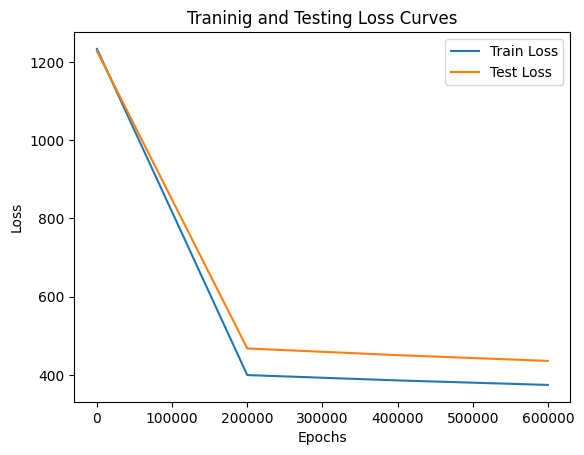

In [ ]:
# Plotting training loss against epoch
plt.plot(epoch_count, train_loss_values, label='Train Loss')

# Plotting testing loss against epoch
plt.plot(epoch_count, test_loss_values, label='Test Loss')
plt.title('Traninig and Testing Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend();

Huhh! That feeling of joy 🤩 when finally see the loss is going down after testing your model with different number of epochs and learning rate  

In [ ]:
# Checking the model state_dict()
my_model_2.state_dict()

OrderedDict([('weights', tensor([3.4910])), ('bias', tensor([219.8185]))])

In [ ]:
# Putting model in the evaluation mode
my_model_2.eval()

# Making prediction
with torch.inference_mode():
  y_preds_1 = my_model_2(x_test_1)
y_preds_1

tensor([2495.9722, 2600.7031, 2192.2524, 2227.1626, 1808.2388, 1864.0953,
        1919.9518, 1431.2072, 1459.1354,  938.9714,  966.8997,  980.8638,
         980.8638,  980.8638, 2876.4949, 2667.0330, 2743.8357, 2387.7502,
        2457.5708, 2544.8467, 2143.3779,  415.3163, 1745.4001, 1804.7477,
        1850.1311, 1361.3865, 1385.8237,  865.6597,  890.0969,  879.6238,
         879.6238,  879.6238, 2904.4231, 2600.7031, 2708.9253, 2290.0012,
        2391.2412, 2492.4812, 2052.6111, 2097.9944, 1619.7229, 1700.0167,
        1783.8015,  321.0584, 1270.6196,  715.5452,  746.9645,  275.6750,
         275.6750,  275.6750])

### Q5. Briefly comment on your results. What could be done to make the model or prediction better? (< 60 words)



#### Comment:
*I think my model result is good, looking at how we extract the data (first & last 100 rows) and after trainig and everything the loss is very low, i'd say my prediction did very well. But may be if had increase the number of epochs and change the learning rate one more time, the model would have been better.*